*Import necessary libraries*

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

First things first, lets import the data set and take a look at it.

# Import the dataset 

In [41]:
raw_data = pd.read_csv('data/raw_data/Musical_instruments_reviews.csv')

# Analyze the dataset

In [42]:
print("The dataset has {} rows and {} columns".format(*raw_data.shape))

The dataset has 10261 rows and 9 columns


In [43]:
print("Column names: {}".format(raw_data.columns.values))

Column names: ['reviewerID' 'asin' 'reviewerName' 'helpful' 'reviewText' 'overall'
 'summary' 'unixReviewTime' 'reviewTime']


In [44]:
raw_data.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


Columns in the dataset:

* reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B
* asin - ID of the product, e.g. 0000013714
* reviewerName - name of the reviewer
* helpful - helpfulness rating of the review, e.g. 2/3
* reviewText - text of the review
* overall - rating of the product
* summary - summary of the review
* unixReviewTime - time of the review (unix time)
* reviewTime - time of the review (raw)

# Modify the data set

We will keep only the columns that are relevant to our task, namely the text (which will be a combination of reviewtext and summary) and the overall rating.

In [45]:
raw_data.drop(['reviewerID', 'asin', 'reviewerName', 'helpful', 'unixReviewTime', 'reviewTime'],axis=1,inplace=True)

In [46]:
raw_data['review'] = raw_data['reviewText'] + ' ' + raw_data['summary']
raw_data.drop(['reviewText', 'summary'],axis=1,inplace=True)

In [47]:
raw_data.head()

,overall,review
0,5.0,"Not much to write about here, but it does exac..."
1,5.0,The product does exactly as it should and is q...
2,5.0,The primary job of this device is to block the...
3,5.0,Nice windscreen protects my MXL mic and preven...
4,5.0,This pop filter is great. It looks and perform...


# Convert Overall to sentiment

If the review mark is 4 or 5, we will consider it positive, if its bllow 4, we will consider it negative, and inbetween (3) its neutral.

In [48]:
def overall_to_sentiment(row):
    
    '''This function returns sentiment value based on the overall ratings from the user'''
    
    if row['overall'] == 3.0:
        val = 'Neutral'
    elif row['overall'] == 1.0 or row['overall'] == 2.0:
        val = 'Negative'
    elif row['overall'] == 4.0 or row['overall'] == 5.0:
        val = 'Positive'
    else:
        val = -1
    return val

raw_data['sentiment'] = raw_data.apply(overall_to_sentiment, axis=1)

In [49]:
raw_data.drop(['overall'],axis=1,inplace=True)
raw_data.head()

,review,sentiment
0,"Not much to write about here, but it does exac...",Positive
1,The product does exactly as it should and is q...,Positive
2,The primary job of this device is to block the...,Positive
3,Nice windscreen protects my MXL mic and preven...,Positive
4,This pop filter is great. It looks and perform...,Positive


# Create new dataset

Lets create a new dataset from the first one, to be fed into the preprocessing pipeline.

In [50]:
# first lets remove all nan values
raw_data.dropna(inplace=True)

In [51]:
# the new folder will be in data/clean_data
raw_data.to_csv('data/clean_data/Musical_instruments_reviews_clean.csv', index=False)

# Plot some graphs

We can first analyse the distribution of the overall rating.

In [31]:
print(raw_data.sentiment.value_counts())

sentiment
Positive    9022
Neutral      772
Negative     467
Name: count, dtype: int64


We can see a clear imbalance in the dataset, with a lot more positive reviews than negative ones.

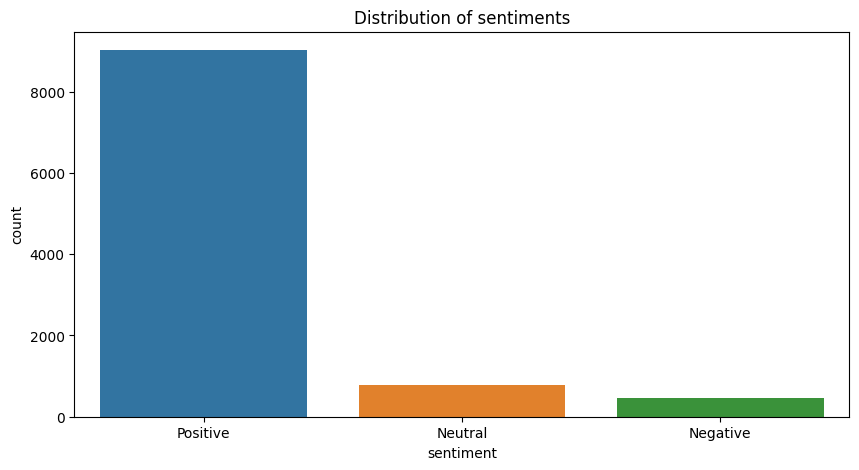

In [33]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'sentiment', data = raw_data)
plt.title('Distribution of sentiments')
plt.show()

We can also show the worldcloud of the reviews for negative reviews.

In [36]:
bad  = raw_data[raw_data['sentiment'] == 'Negative'].review

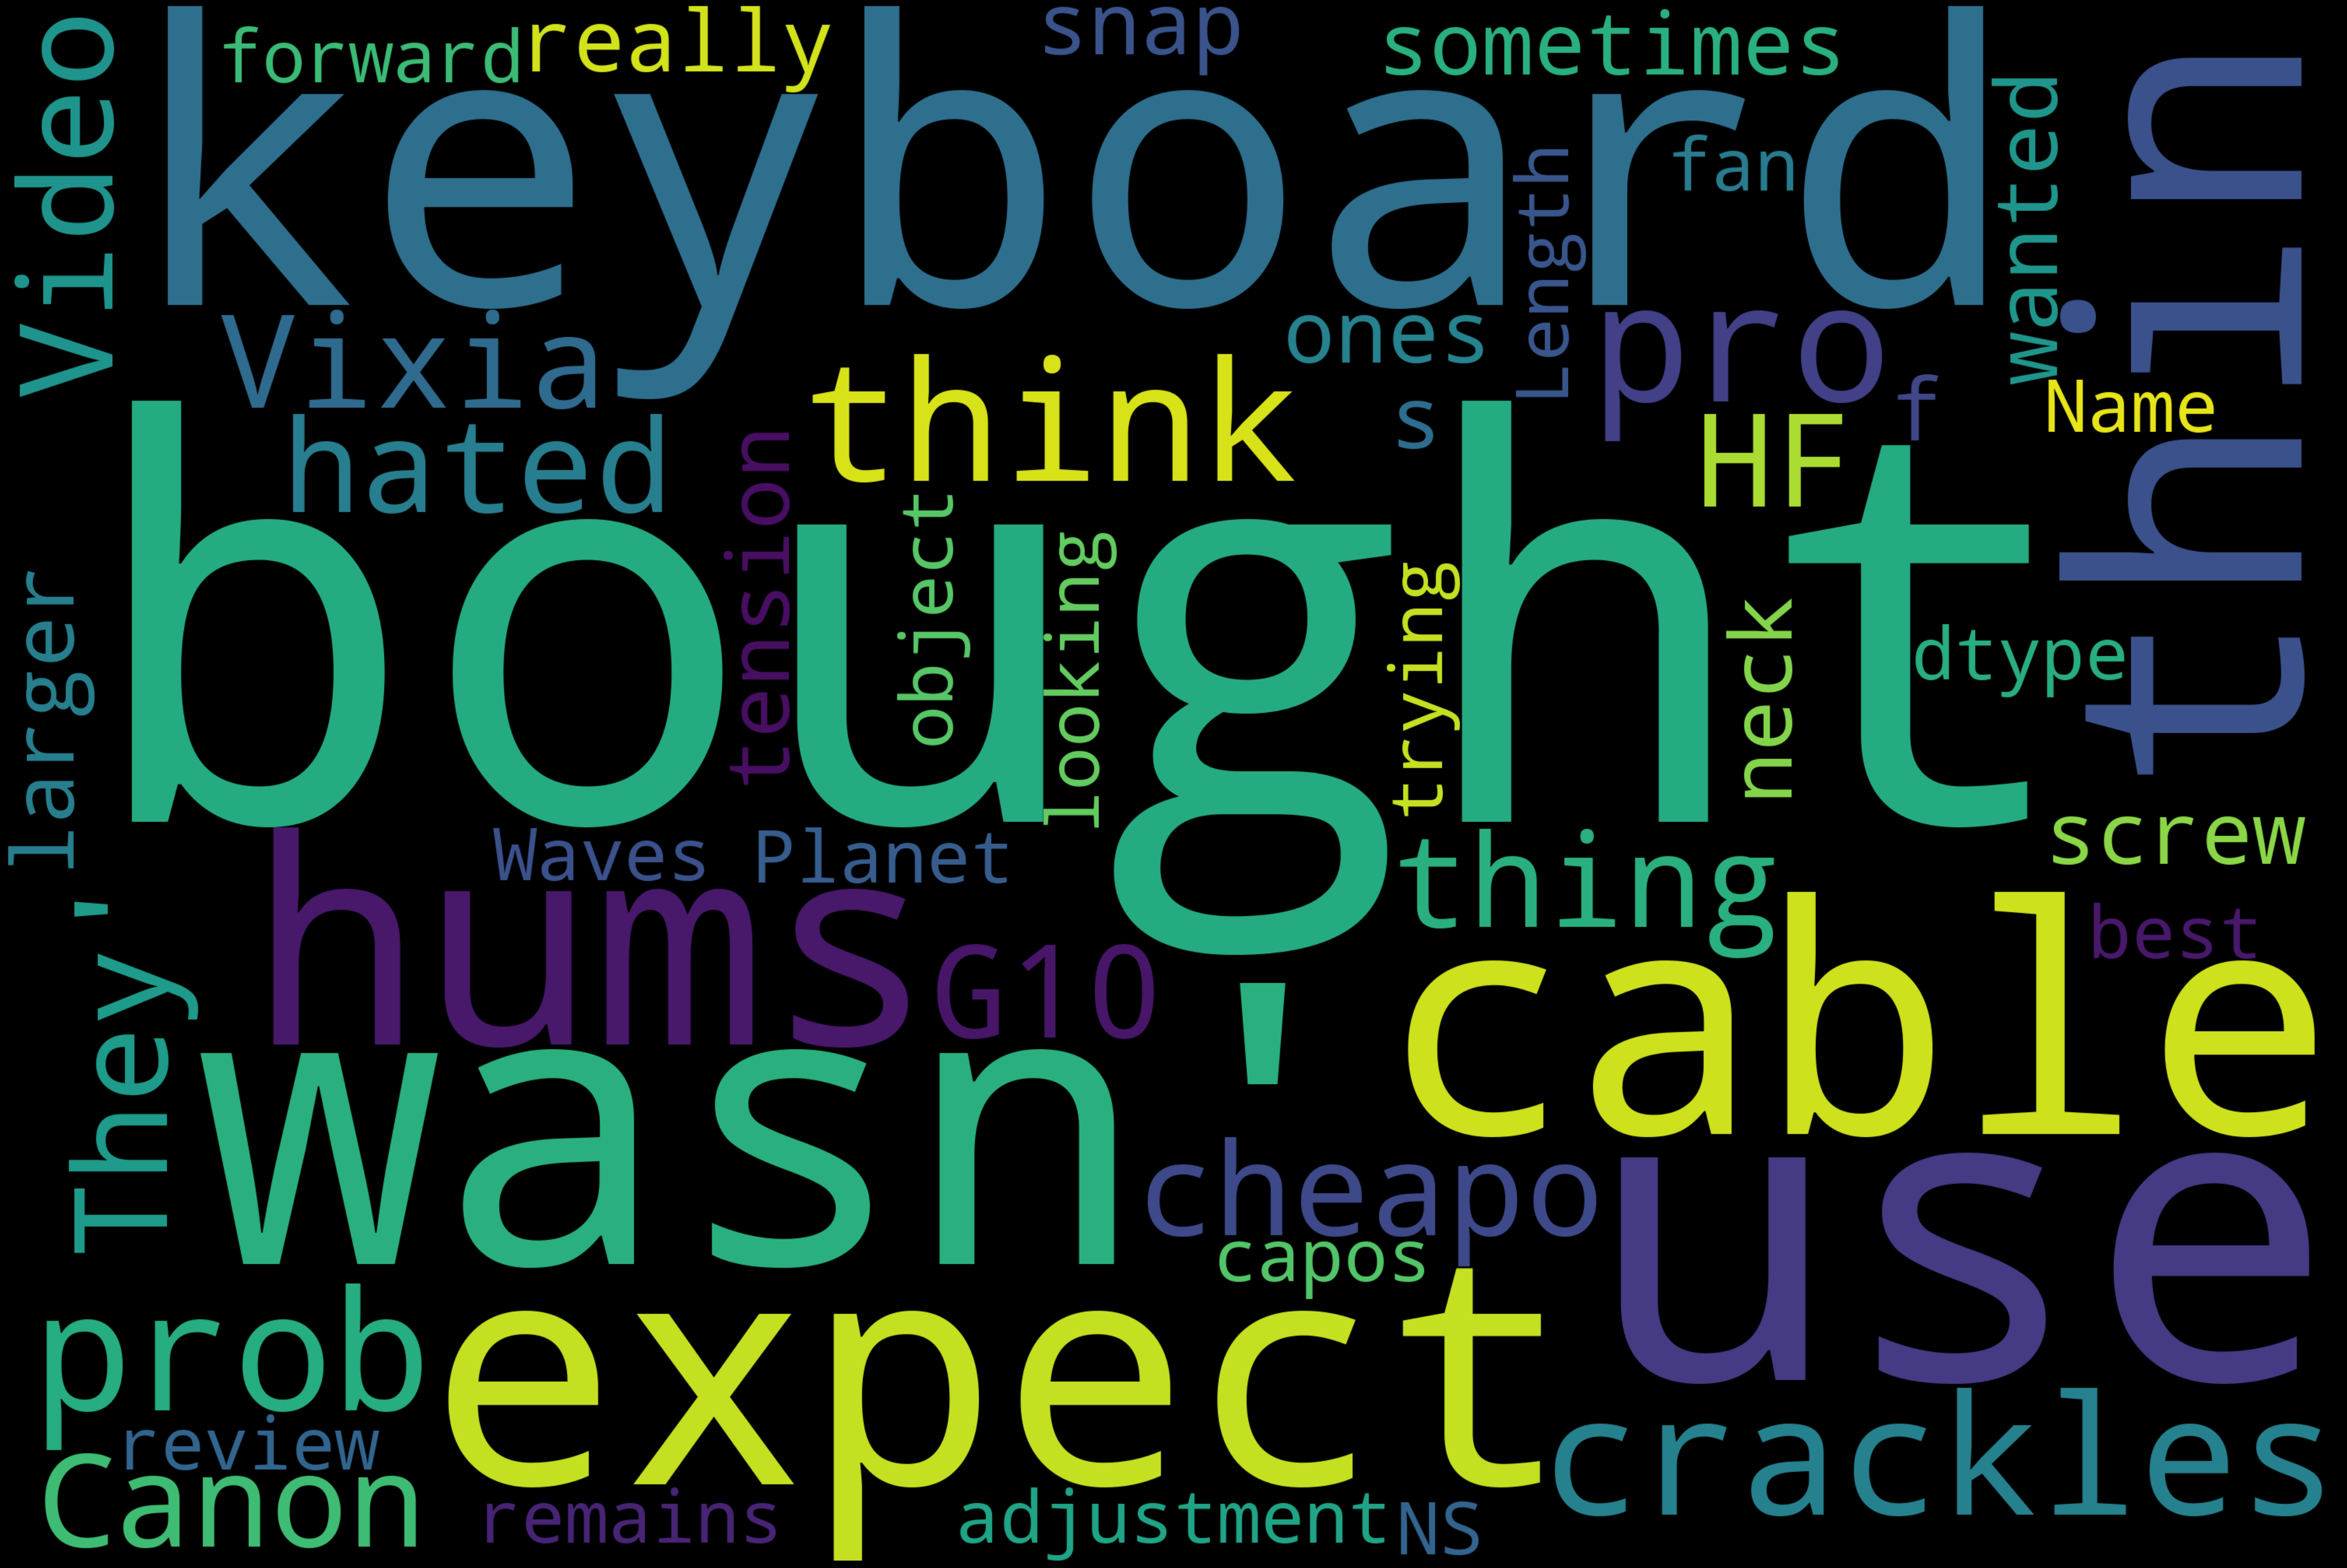

In [54]:
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black').generate(str(bad))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

We can see bad comments sush as cheap, crackles, snap, etc.

Lets try for good reviews as well.

In [52]:
good  = raw_data[raw_data['sentiment'] == 'Positive'].review

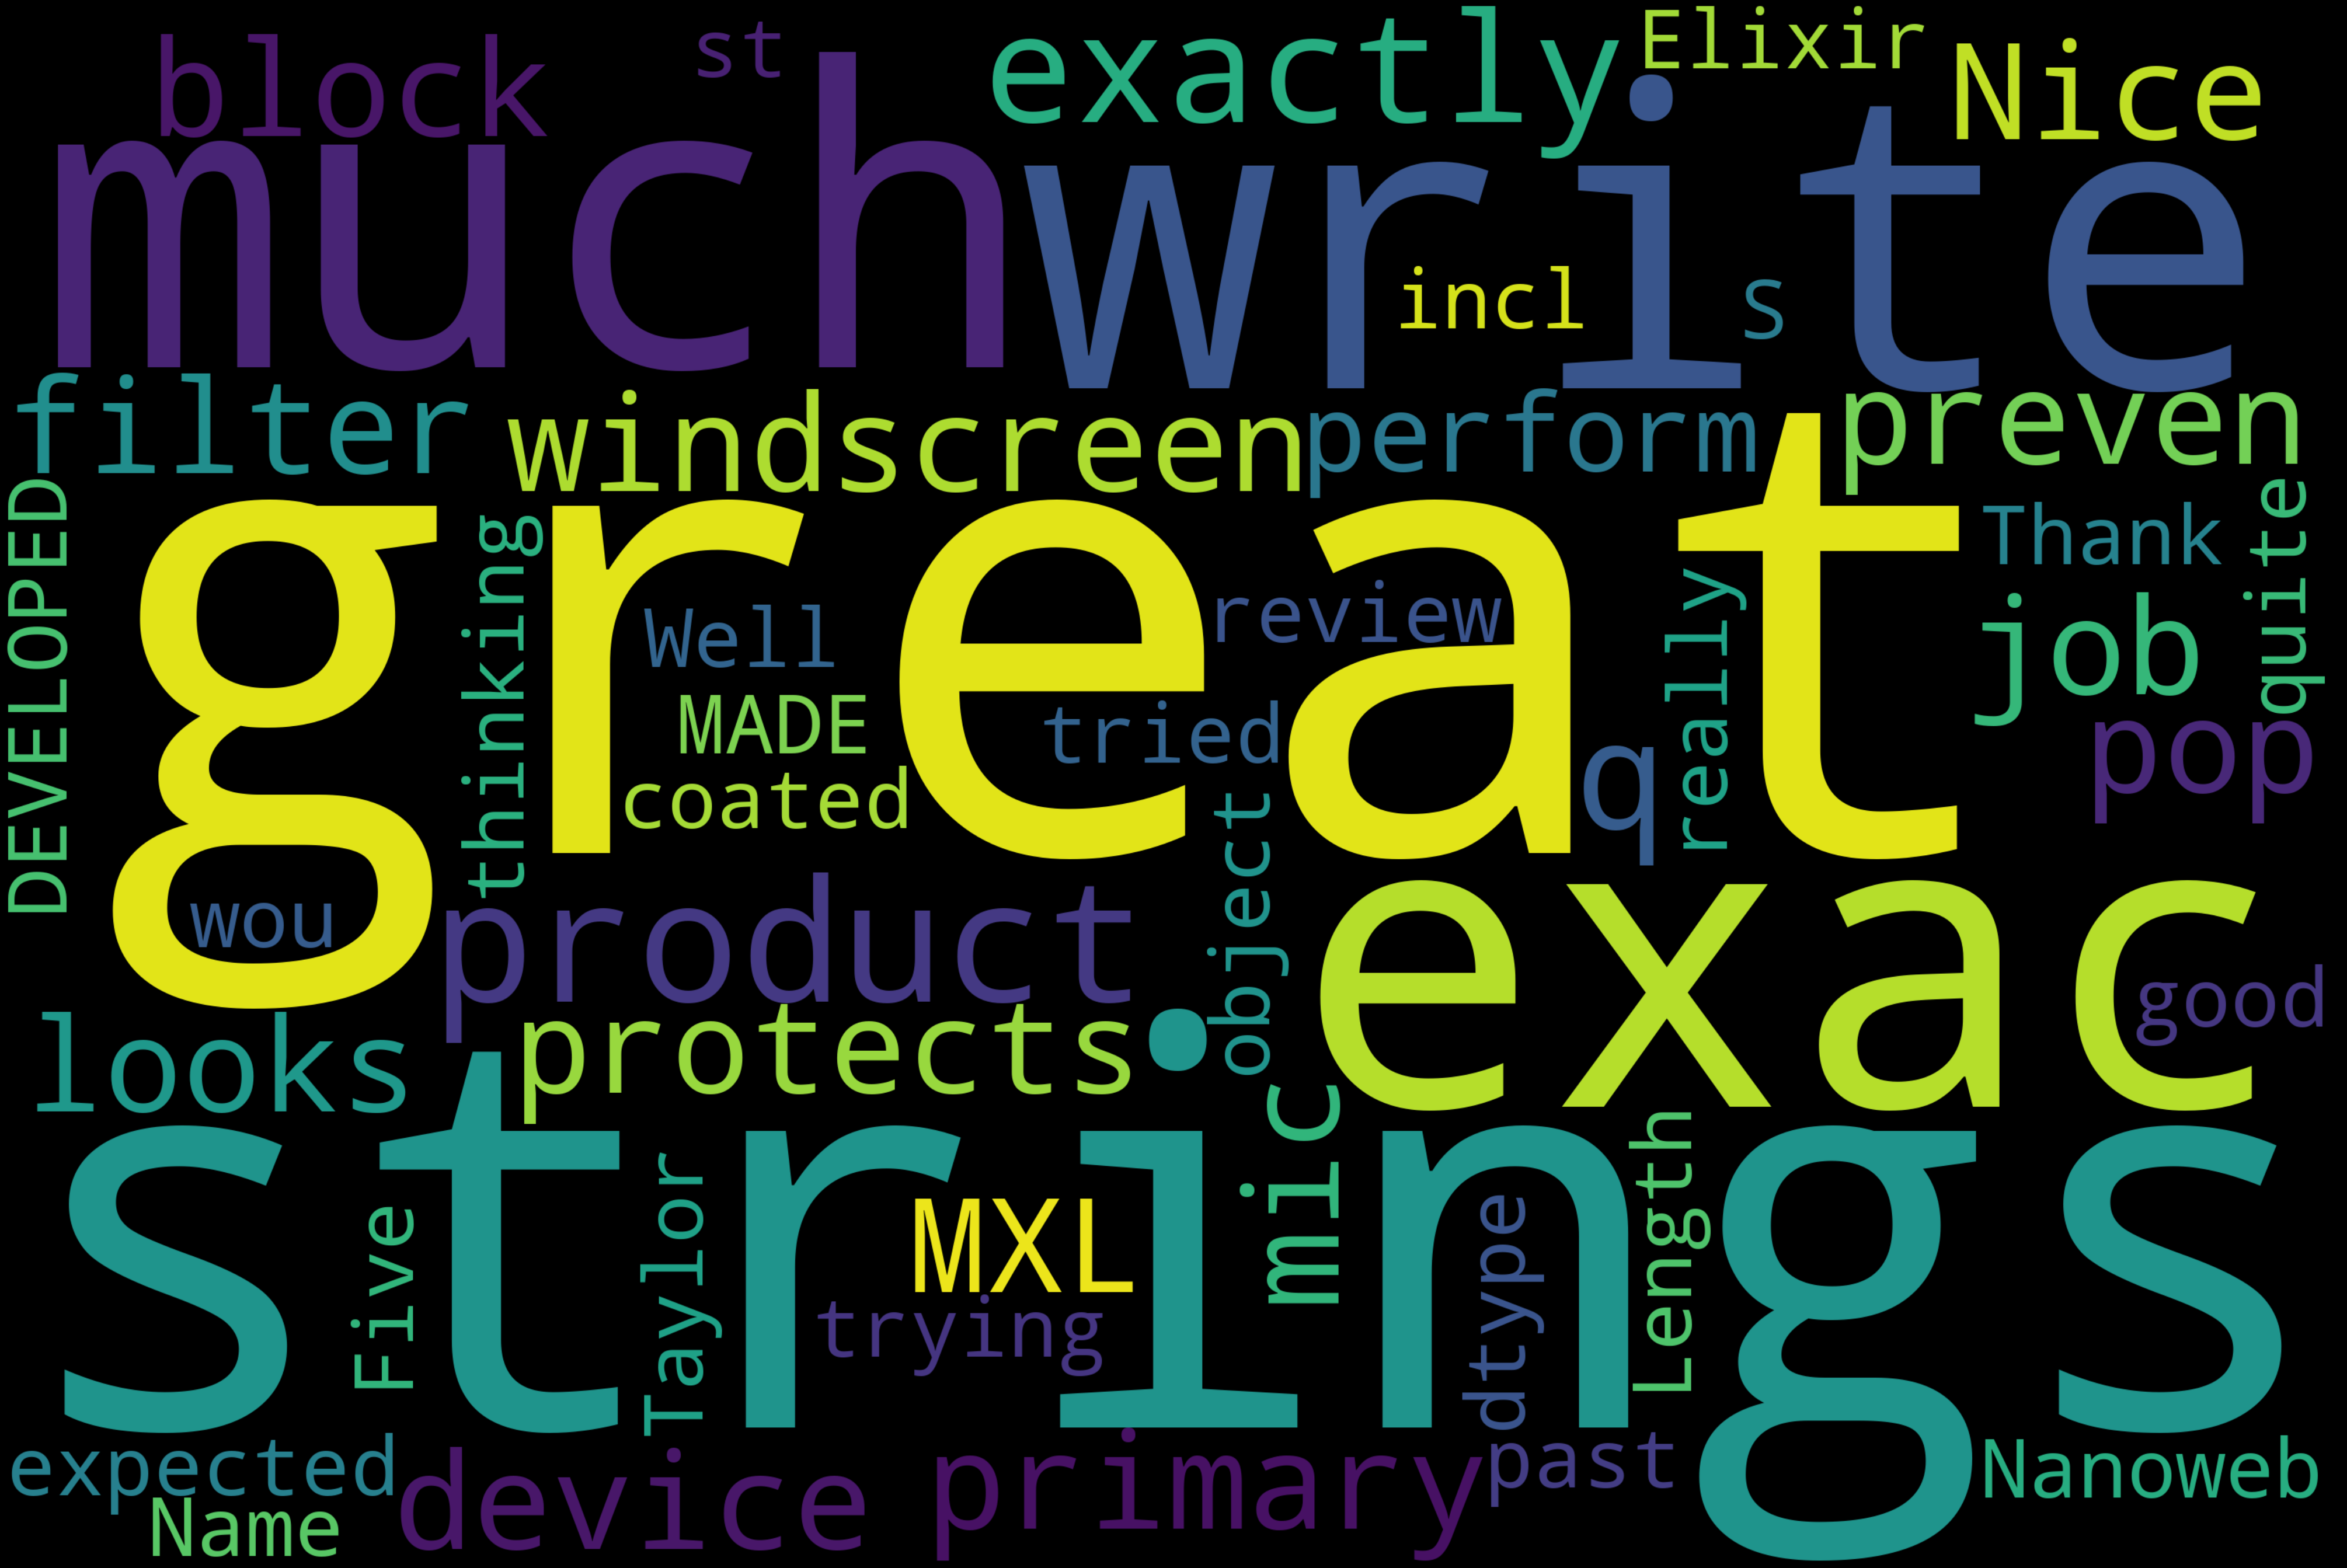

In [53]:
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black').generate(str(good))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

We can read some good words like : great, exactly, nice, expected, good, thank, etc.